In [2]:
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
img_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '../Dataset/train_data',
    shuffle = True,
    image_size = (256, 256),
    batch_size = 32)
class_names = img_dataset.class_names
print(class_names)

Found 2000 files belonging to 2 classes.
['Tomato___Bacterial_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


In [4]:
data_directory = '../Dataset/train_data'

# Define image data generator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2  # Percentage of data to use for validation
)

# Load and split the dataset into training and testing sets
train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='training',
    seed=42
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='validation',
    seed=42
)


Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [5]:
# Define model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
hist = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
50/50 [==============================] - 100s 2s/step - loss: 0.7557 - accuracy: 0.6894 - val_loss: 0.3735 - val_accuracy: 0.8575
Epoch 2/10
50/50 [==============================] - 72s 1s/step - loss: 0.1998 - accuracy: 0.9294 - val_loss: 0.1468 - val_accuracy: 0.9525
Epoch 3/10
50/50 [==============================] - 45s 892ms/step - loss: 0.1617 - accuracy: 0.9356 - val_loss: 0.1562 - val_accuracy: 0.9400
Epoch 4/10
50/50 [==============================] - 45s 895ms/step - loss: 0.1323 - accuracy: 0.9538 - val_loss: 0.1075 - val_accuracy: 0.9675
Epoch 5/10
50/50 [==============================] - 44s 888ms/step - loss: 0.0757 - accuracy: 0.9700 - val_loss: 0.0749 - val_accuracy: 0.9725
Epoch 6/10
50/50 [==============================] - 45s 895ms/step - loss: 0.0621 - accuracy: 0.9769 - val_loss: 0.0820 - val_accuracy: 0.9700
Epoch 7/10
50/50 [==============================] - 46s 911ms/step - loss: 0.0810 - accuracy: 0.9712 - val_loss: 0.1360 - val_accuracy: 0.9400
Epoc

In [7]:
model.save('classifier.keras')
model = load_model('classifier.keras')

In [8]:
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)
prec = model.

13/13 [==============================] - 2s 160ms/step - loss: 0.0708 - accuracy: 0.9750
Test accuracy: 0.9750000238418579


In [1]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy ')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

NameError: name 'plt' is not defined

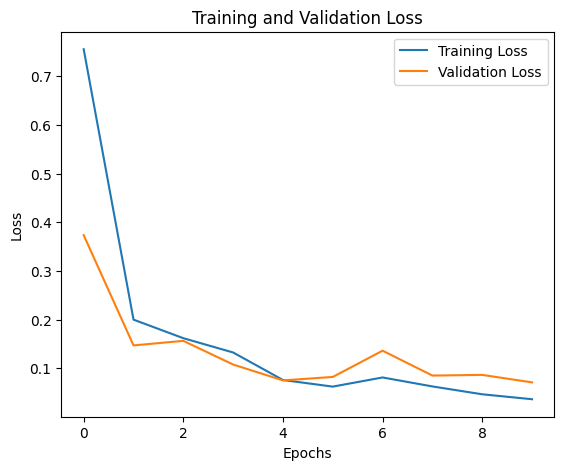

In [10]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss ')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()